# SISTEMA DE INFERENCIA BORROSA LINGÜÍSTICO - MAMDANI

## Ejemplo General

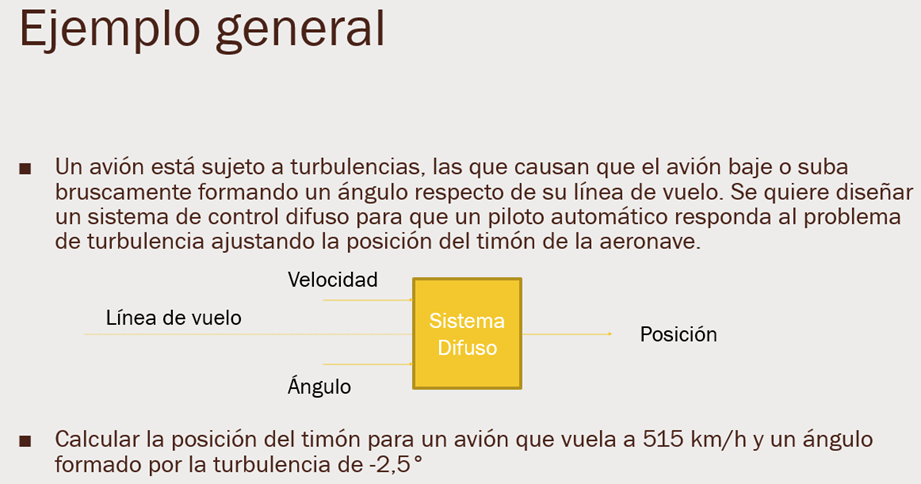

### Importar librerias

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings

warnings.filterwarnings("ignore")

### 1. Declarar antecedentes y consecuentes y universos de discursos

In [51]:
# Antecedentes
velocidad = ctrl.Antecedent(np.arange(0, 1001, 1), 'velocidad')
angulo = ctrl.Antecedent(np.arange(-10, 11, 1), 'angulo')

# Consecuentes
posicion = ctrl.Consequent(np.arange(-5, 6, 1), 'posicion')

### 2. Fuzzificar antecedentes y consecuentes

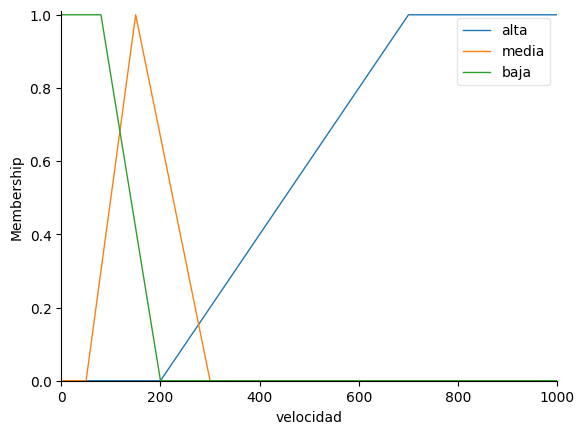

In [52]:
# Velocidad
velocidad['alta'] = fuzz.trapmf(velocidad.universe, [200, 700, 1000, 1000])
velocidad['media'] = fuzz.trimf(velocidad.universe, [50, 150, 300])
velocidad['baja'] = fuzz.trapmf(velocidad.universe, [0, 0, 80, 200])

velocidad.view()
plt.show()

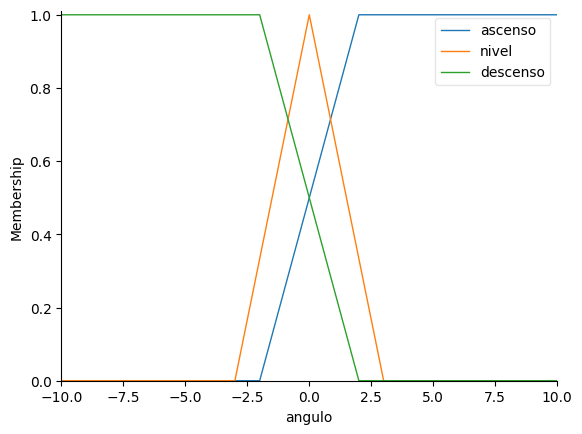

In [53]:
# Angulo
angulo['ascenso'] = fuzz.trapmf(angulo.universe, [-2, 2, 10, 10])
angulo['nivel'] = fuzz.trimf(angulo.universe, [-3, 0, 3])
angulo['descenso'] = fuzz.trapmf(angulo.universe, [-10, -10, -2, 2])

angulo.view()
plt.show()

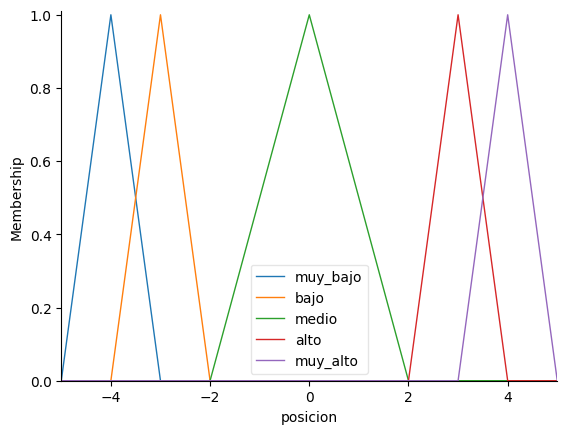

In [54]:
# Posicion
posicion['muy_bajo'] = fuzz.trimf(posicion.universe, [-5, -4, -3])
posicion['bajo'] = fuzz.trimf(posicion.universe, [-4, -3, -2])
posicion['medio'] = fuzz.trimf(posicion.universe, [-2, 0, 2])
posicion['alto'] = fuzz.trimf(posicion.universe, [2, 3, 4])
posicion['muy_alto'] = fuzz.trimf(posicion.universe, [3, 4, 5])

posicion.view()
plt.show()

### 3. Base de Conocimiento

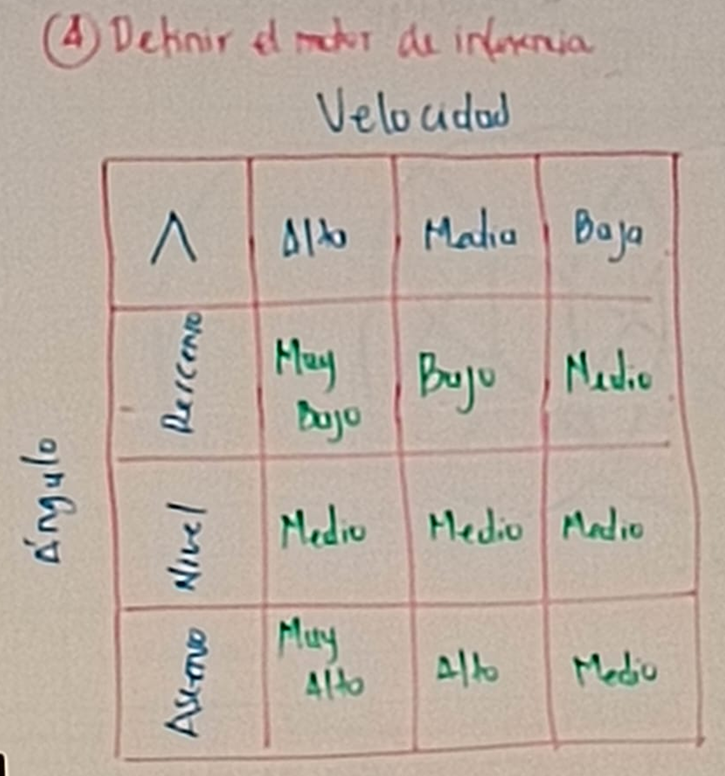

In [55]:
# Se pueden copiar todas las reglas
regla_1 = ctrl.Rule(velocidad['alta'] & angulo['ascenso'], posicion['muy_alto'])
regla_2 = ctrl.Rule(velocidad['alta'] & angulo['nivel'], posicion['medio'])
regla_3 = ctrl.Rule(velocidad['alta'] & angulo['descenso'], posicion['muy_bajo'])
regla_4 = ctrl.Rule(velocidad['media'] & angulo['ascenso'], posicion['alto'])
regla_5 = ctrl.Rule(velocidad['media'] & angulo['nivel'], posicion['medio'])
regla_6 = ctrl.Rule(velocidad['media'] & angulo['descenso'], posicion['bajo'])
regla_7 = ctrl.Rule(velocidad['baja'] & angulo['ascenso'], posicion['medio'])
regla_8 = ctrl.Rule(velocidad['baja'] & angulo['nivel'], posicion['medio'])
regla_9 = ctrl.Rule(velocidad['baja'] & angulo['descenso'], posicion['medio'])

In [56]:
# O agrupar por consecuente
regla_medio = ctrl.Rule(antecedent=
  (
    (velocidad['alta'] & angulo['nivel'])   |
    (velocidad['media'] & angulo['nivel'])  |
    (velocidad['baja'] & angulo['ascenso']) |
    (velocidad['baja'] & angulo['nivel'])   |
    (velocidad['baja'] & angulo['descenso'])
  ),
  consequent=posicion['medio']
)


### 4. Motor de inferencia

In [57]:
control_vuelo = ctrl.ControlSystem([regla_1, regla_2, regla_3, regla_4, regla_5, regla_6, regla_7, regla_8, regla_9])

### 5. Implementar el SIB - Mamdani

In [58]:
posicion_timon = ctrl.ControlSystemSimulation(control_vuelo)
posicion_timon.input['velocidad'] = 515
posicion_timon.input['angulo'] = -2.5
posicion_timon.compute()

In [59]:
posicion_timon.output['posicion']

np.float64(-2.341862691156852)

#### Reglas activadas

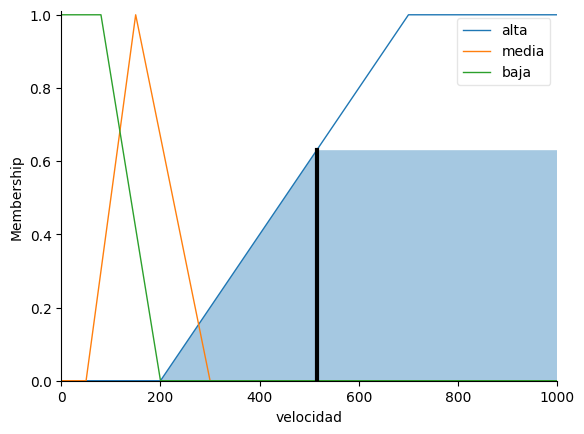

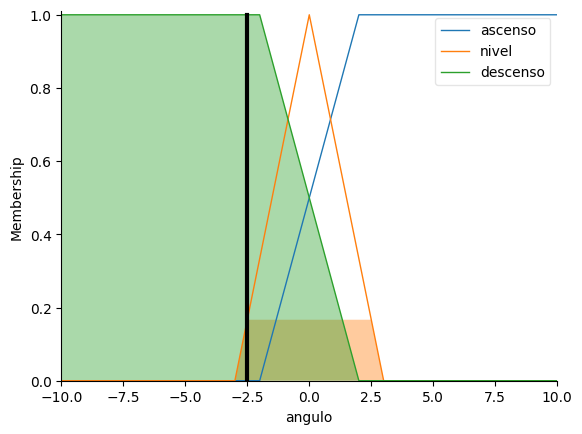

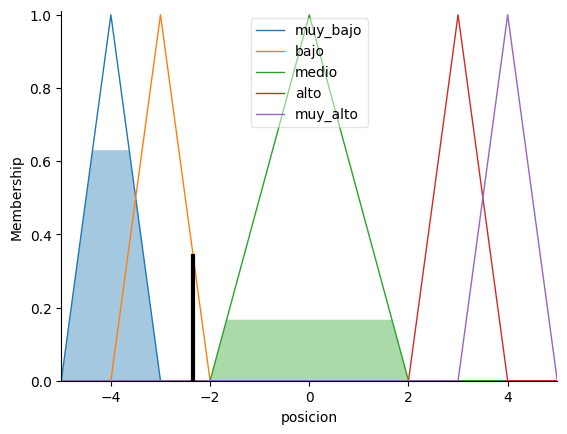

In [60]:
velocidad.view(sim=posicion_timon)
angulo.view(sim=posicion_timon)
posicion.view(sim=posicion_timon)

#### Sub Ejercicio

In [61]:
posicion_timon_2 = ctrl.ControlSystemSimulation(control_vuelo)
posicion_timon_2.input['velocidad'] = 250
posicion_timon_2.input['angulo'] = 1.7
posicion_timon_2.compute()

In [62]:
posicion_timon_2.output['posicion']

np.float64(0.695214423934832)

##### Reglas activadas

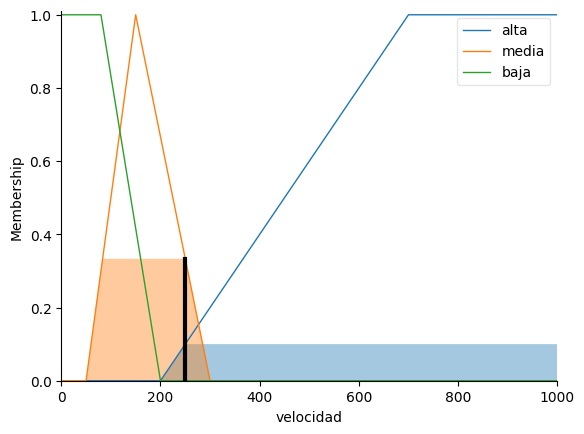

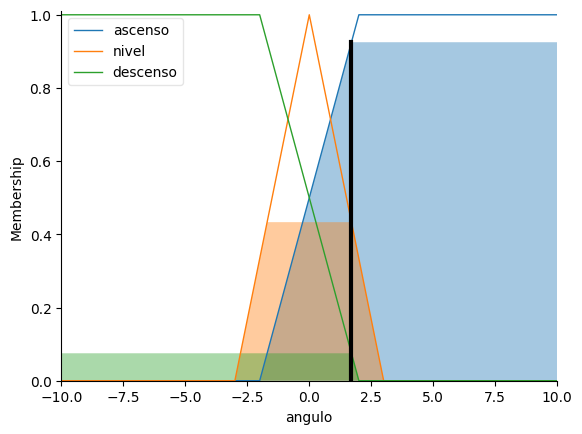

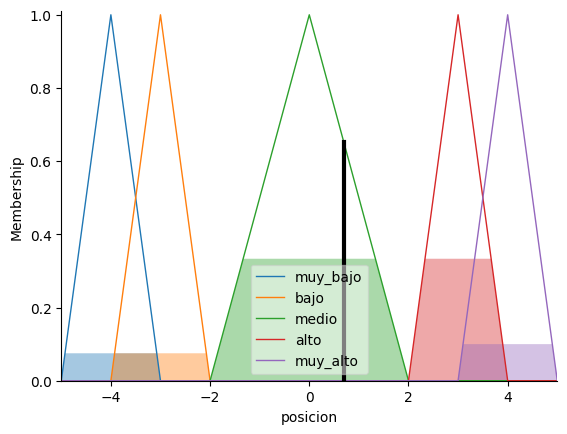

In [63]:
velocidad.view(sim=posicion_timon_2)
angulo.view(sim=posicion_timon_2)
posicion.view(sim=posicion_timon_2)